# QBio REU Intermediate Python

## Week 2 Exercises: Numpy and Matplotlib Basics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# I personally use the following lines to change some matplotlib defaults
%config InlineBackend.figure_format = 'retina' #If you have a high res display, render the plots more nicely
mpl.rc("text", usetex=False) #if you have Latex set this to true and matplotlib will render labels in latex. 
                             #This will throw a large inscrutible error if you do not have latex installed
mpl.rc("font", family = "serif") #Serif font in matplotlib
mpl.rc("figure",figsize=(9,6)) #Increase default figure size
mpl.style.use('dark_background') #Use a dark background for matplotlib figures if youre using dark theme
plt.rcParams.update({"figure.facecolor": "111111", #Match the background color to dark theme notebook
                    "savefig.facecolor": "212121"}) #Match the background of saved figures to Google Slides Dark Theme

### Exercise 1

The softmax funtion takes a vector of real numbers and converts it to a valid probability vector (i.e. a vector whose elements are all positive and sum to 1.) The softmax function is defined as

$$ \text{softmax}(x)_i = \dfrac{e^{x_i}}{\sum_j e^{x_j}}$$

As a note, some of you might recognize this as the Boltzmann Distribution from thermodynamics where it allows us to convert energies into probabilities. A common data analysis problem is classification where we want to assign each data point to one of K classes. Many classification schemes predict probability of membership in each of the K classes rather than assigning each data point to a single class. Lets imagine that we are using such a classification scheme but I give you an array with shape (N,K) where there are N examples and K classes. Instead of giving you probabilities I've given you "scores" or unnormalized probabilities.

**Part 1** Using only numpy functions and without writing any for loops, write a softmax function that converts this array into a set of probability vectors.

*Hint* Think about what dimension you want to apply the softmax over.
*Hint* There is a `scipy` softmax implementation `scipy.special.softmax` which I would encourage you to use in the future but not for this exercise
.

In [3]:
scores = 10*np.random.randn(1000,16)

In [4]:
def softmax(x):
    p = np.exp(x)
    p = p/p.sum(-1,keepdims=True)
    return p

In [5]:
probs = softmax(scores)

In [6]:
np.all(probs>=0)

True

In [7]:
np.allclose(probs.sum(-1),1)

True

In [8]:
from scipy import special

In [9]:
scipy_probs = special.softmax(scores,axis=-1)

In [10]:
np.allclose(probs,scipy_probs)

True

**Part 2** 

Using only numpy functions, compute the most likely class for each datapoint. As a bonus challenge, can you compute the top 3 most likely classes for each datapoint? Can you produce an array that contains the K classes ranked for each example from most likely to least?

You'll notice that these can be calculated from either the scores or the probabilities since the softmax function is monotonically increasing. This is one of many reasons that softmax is a nice function for this sort of thing.

In [11]:
assignments = np.argmax(scores,axis=-1)

In [12]:
ranked_assignments = np.flip(np.argsort(scores), axis=-1)

In [13]:
scores[123]

array([ -4.35399969,  -2.26768355,  -2.07375862,   1.87436965,
       -21.29817152, -10.17243529,   0.98804949,  12.49016076,
        -4.70545938,  -0.44113241,   2.12104893, -10.89952391,
        -0.53565719,   4.86040108,  -3.78482305,   8.08131236])

In [14]:
assignments[123]

7

In [15]:
ranked_assignments[123]

array([ 7, 15, 13, 10,  3,  6,  9, 12,  2,  1, 14,  0,  8,  5, 11,  4])

### Exercise 2

I've included three files containing the cumulative number of Covid19 cases in 7 states from March 1 - June 30, 2019.* They are

- `state_covid.npy` - Cumulative cases in each of the seven states
- `state_names.npy` - The names of the seven states in the same order as for the case data
- `state_pop.npy` - State population for 2019 as projected by the US Census Bureau


**Part 1**

-  Load all the data files into numpy arrays
-  Make a *nice* plot showing the number of total cases in each state (Dont worry about the x-axis handling dates is doable but more trouble than its worth at this point)


\* I took this date from [Johns Hopkins CSSE Github Page](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series). They have collected a lot of this data and also produced a [particulary good dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) for visualizing it (which I thought was great until it all became too depressing...).





In [16]:
state_pop = np.load('state_pop.npy')

In [17]:
state_names = np.load('state_names.npy')

In [18]:
state_covid = np.load('state_covid.npy')

Just so you have an example of how to do this, I'm making an array using [numpy datetimes](https://numpy.org/doc/stable/reference/arrays.datetime.html). This is not super important but if you find yourself using dates it is quite nice so check out the documentation.

In [80]:
dates = np.arange('2020-03','2020-07', dtype='datetime64[D]') 

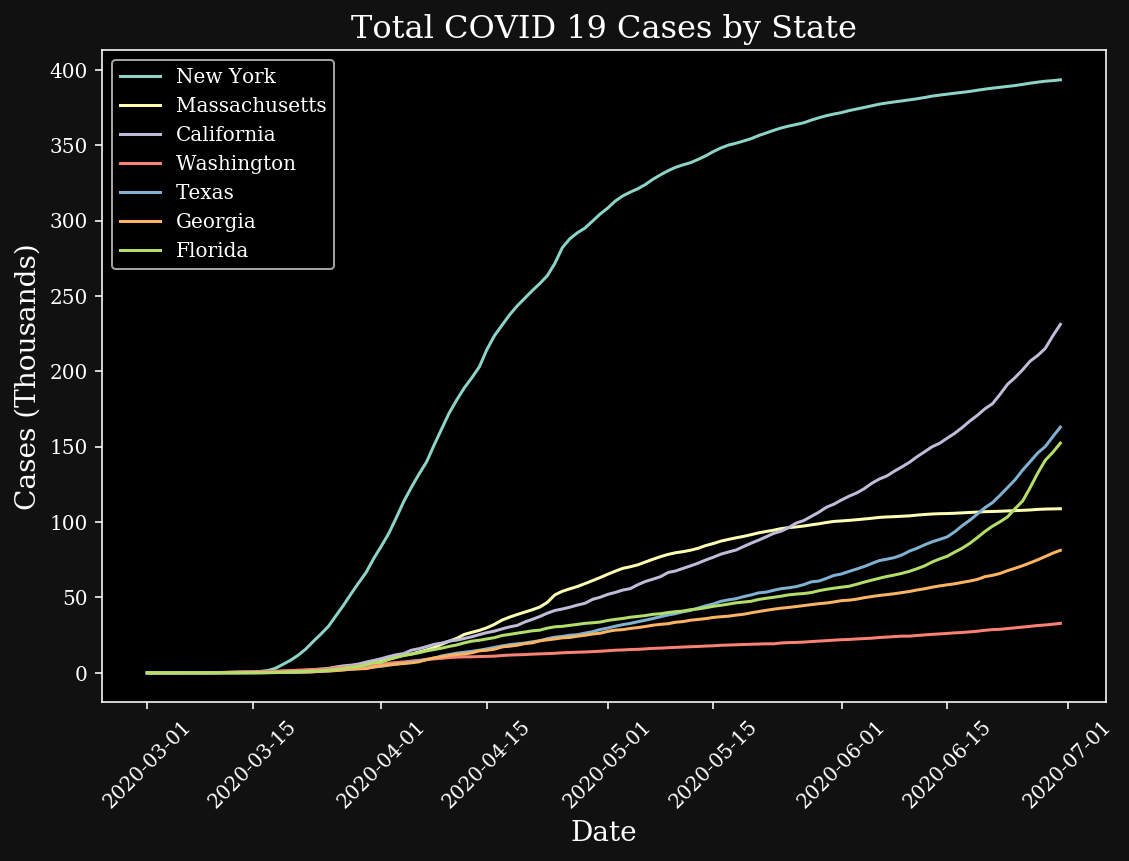

In [81]:
for i,d in enumerate(state_covid):
    plt.plot(dates, d/1000, label=state_names[i])
plt.title("Total COVID 19 Cases by State", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cases (Thousands)", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Part 2**
- Compute the *per capita* case rate in each state using the states total population.
- Make a plot similar to the one you made in part 1 showing the per capita case rate 

We need to divide the cases in each state by that state's total population.

In [31]:
state_pop.shape

(7,)

In [32]:
state_covid.shape

(7, 122)

In [ ]:
#Check this error - we need to use broadcasting
state_covid/state_pop

In [37]:
per_capita = state_covid/state_pop.reshape(-1,1)

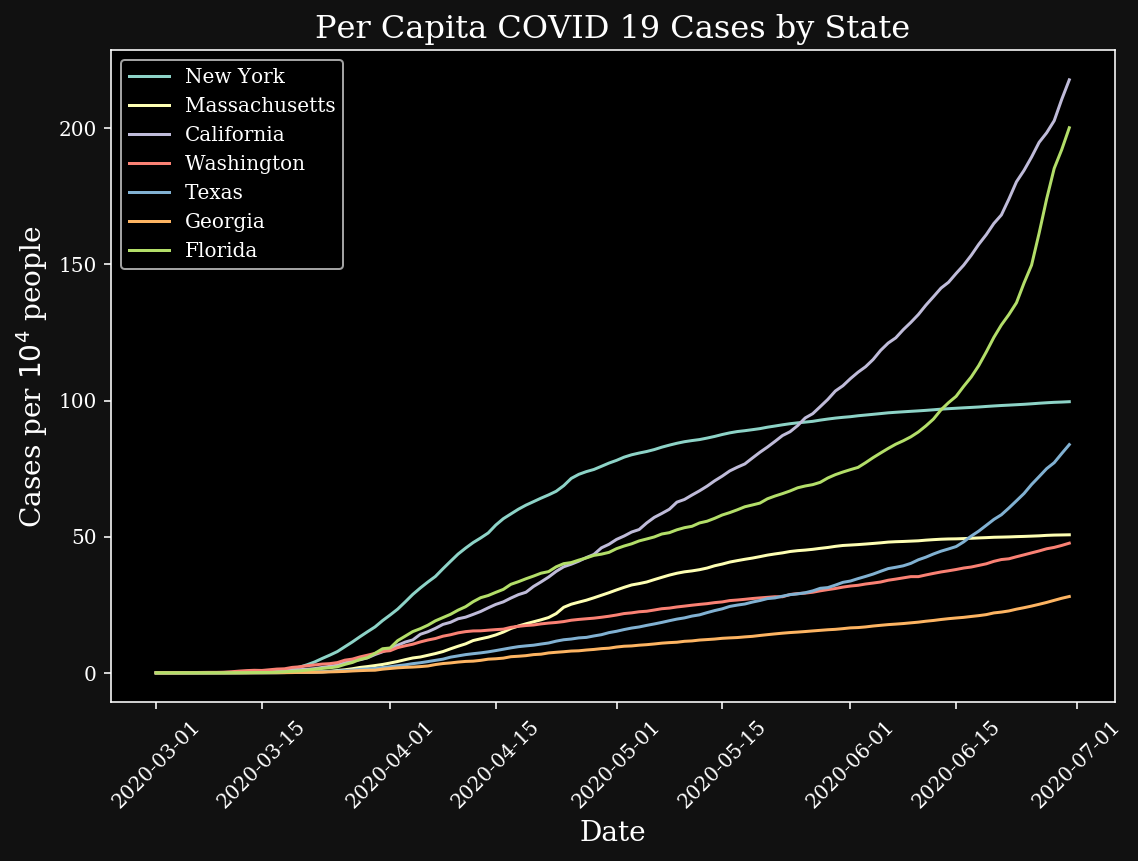

In [42]:
for i,d in enumerate(per_capita):
    plt.plot(dates, 1e4*d, label=state_names[i])
plt.title("Per Capita COVID 19 Cases by State", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cases per $10^4$ people", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Part 3**

- Many people are more concerned with the daily case rate. To compute this from the cumulative data, we could just subtract each day from the previous one to estimate how many new cases appeared that day. Compute and plot the daily number of cases for each state.
- On which day did each state have the most new cases? Don't worry about computing the date just get days since March 1. I did initalize an array of datetimes below if you want to play with it.

*Hint* This can be done very easilly with numpy. Do not write a for loop for this.

In [67]:
# google "numpy difference between elements" or "numpy subtract element from next element"
daily = np.diff(state_covid,axis=-1)

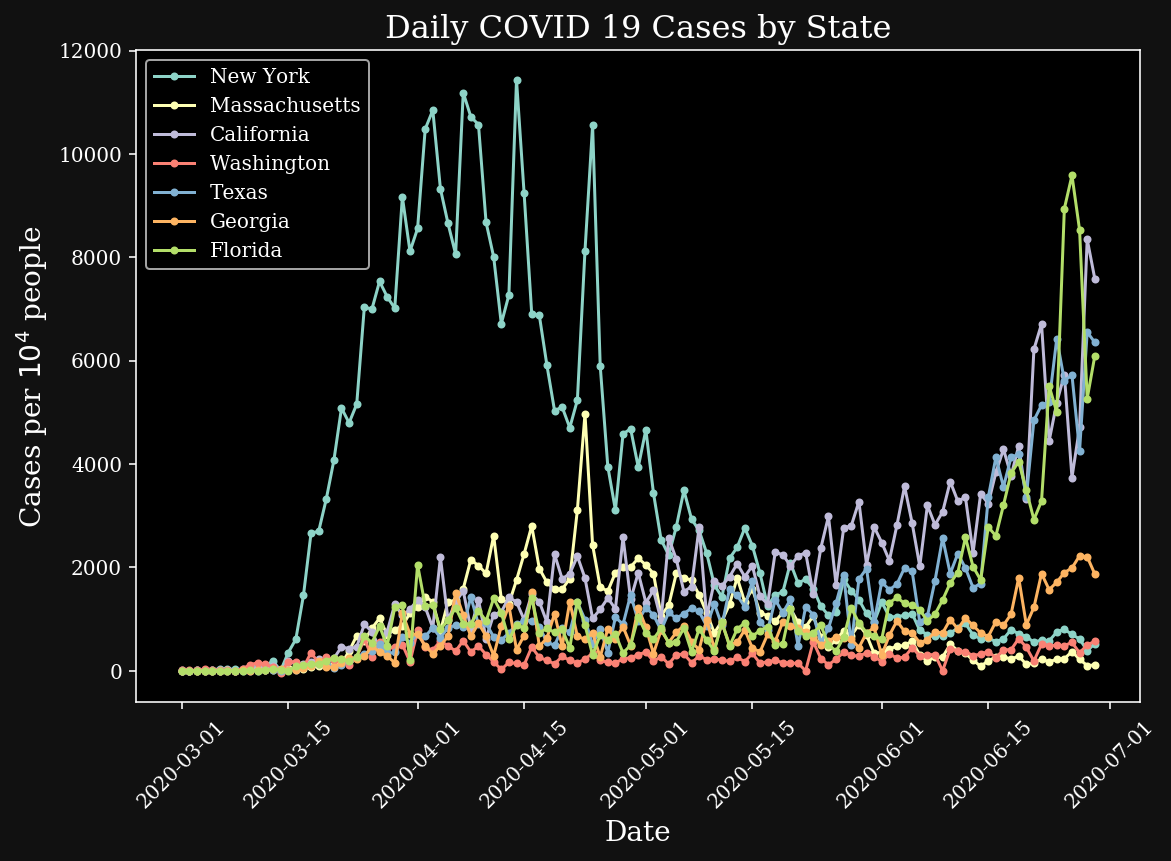

In [64]:
for i,d in enumerate(daily):
    plt.plot(dates[:-1], d,'o-', markersize=3, label=state_names[i])
plt.title("Daily COVID 19 Cases by State", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cases per $10^4$ people", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [70]:
max_case_days = np.argmax(daily,axis=-1)
max_case_dates = dates[max_case_days]

In [72]:
for i,state in enumerate(state_names):
    print(f"{state} had the most new cases on {max_case_dates[i]} (Day {max_case_days[i]})")

New York had the most new cases on 2020-04-14 (Day 44)
Massachusetts had the most new cases on 2020-04-23 (Day 53)
California had the most new cases on 2020-06-28 (Day 119)
Washington had the most new cases on 2020-04-01 (Day 31)
Texas had the most new cases on 2020-06-28 (Day 119)
Georgia had the most new cases on 2020-06-27 (Day 118)
Florida had the most new cases on 2020-06-26 (Day 117)


Frankly this plot is a little noisy since the day to day variability. A better thing to do would be to smooth this using a moving average. This is totally extra but a reminder to keep your eyes open for bad plots!

In [73]:
# Took this directly from stack overflow
# googled "numpy moving average"
# https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy
def moving_average(a, n=3) :
    ret = np.cumsum(a, axis=-1)
    ret[:,n:] = ret[:,n:] - ret[:,:-n]
    return ret[:,n - 1:] / n 

In [62]:
n_days = 14 #two week moving average - I know NYTimes has been using this
smooth_daily = moving_average(daily,n_days)

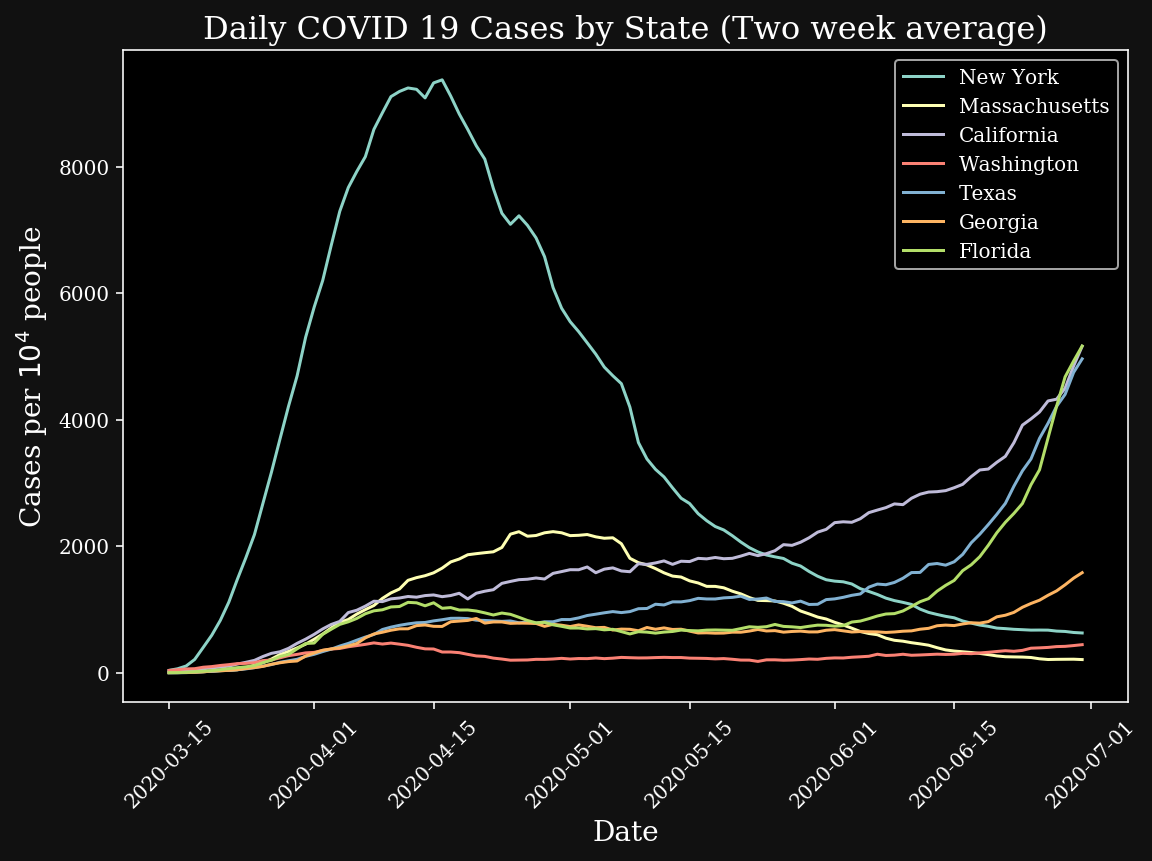

In [66]:
for i,d in enumerate(smooth_daily):
    plt.plot(dates[n_days:], d, markersize=3, label=state_names[i])
plt.title("Daily COVID 19 Cases by State (Two week average)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cases per $10^4$ people", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Exercise 3

Load some data from your research into numpy arrays. Compute something useful about it (mean, standard deviation, max, some mathematical function). Make an informative plot to show what you have.